In [45]:
import  tensorflow as tf

In [46]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [30]:
(x_train,y_train),(x_test,y_test)  = keras.datasets.mnist.load_data()

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
y_train.shape

(60000,)

In [35]:
len(y_train)

60000

In [36]:
import matplotlib.pyplot as plt



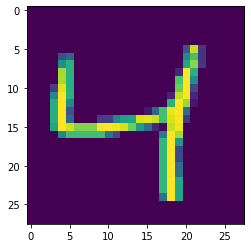

In [37]:
plt.imshow(x_train[2])

In [38]:
x_train = x_train/255
x_test = x_test/255

In [39]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = "softmax"))


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer ='Adam',metrics =["Accuracy"] )

In [47]:
early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 5
)

In [50]:
history = model.fit(
    x_train,y_train,
    validation_split = 0.2,
    validation_data = (x_test,y_test),
    epochs = 25,
    callbacks = early_stoping
)

Epoch 1/25
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2870 - Accuracy: 0.9159 - val_loss: 0.1370 - val_Accuracy: 0.9582
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1205 - Accuracy: 0.9630 - val_loss: 0.1086 - val_Accuracy: 0.9682
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0843 - Accuracy: 0.9747 - val_loss: 0.1097 - val_Accuracy: 0.9672
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0650 - Accuracy: 0.9796 - val_loss: 0.0876 - val_Accuracy: 0.9731
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0496 - Accuracy: 0.9843 - val_loss: 0.0973 - val_Accuracy: 0.9712
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0409 - Accuracy: 0.9870 - val_loss: 0.0941 - val_Accuracy: 0.9752
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0317 - Accuracy: 0.9902 - val_loss: 0.1065 - val_Accuracy:

In [66]:
y_pred = model.predict(x_test)

In [67]:
y_pred = y_pred.argmax(axis = 1)


In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9762

In [69]:
confusion_matrix(y_test,y_pred)

array([[ 970,    1,    0,    1,    0,    1,    2,    2,    1,    2],
       [   0, 1118,    2,    1,    0,    1,    5,    0,    8,    0],
       [   3,    2, 1008,    6,    2,    0,    2,    7,    2,    0],
       [   0,    1,    4,  972,    0,   17,    0,    4,    3,    9],
       [   1,    0,    4,    0,  946,    0,    5,    1,    2,   23],
       [   2,    0,    0,    4,    1,  873,    3,    2,    4,    3],
       [   3,    2,    1,    1,    4,    3,  942,    1,    1,    0],
       [   0,    2,    6,    3,    2,    1,    0, 1000,    1,   13],
       [   4,    0,    2,    5,    2,    6,    2,    4,  942,    7],
       [   1,    2,    0,    3,    5,    3,    0,    4,    0,  991]])

In [72]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

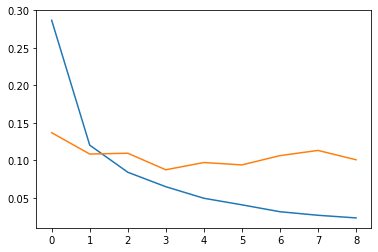

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
